In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Campo Magnetico

In [2]:
DATA_LOCATION = "./Clean/Campo/medidas.csv"
data = pd.read_csv(DATA_LOCATION).sort_values("Corriente(A)")
data

,Corriente(A),Campo(mT)
0,0.00,0.0
1,0.14,2.1
11,0.14,2.3
2,0.24,4.5
12,0.25,5.2
13,0.42,7.1
3,0.42,8.1
4,0.55,10.5
14,0.60,10.3
15,0.92,17.1


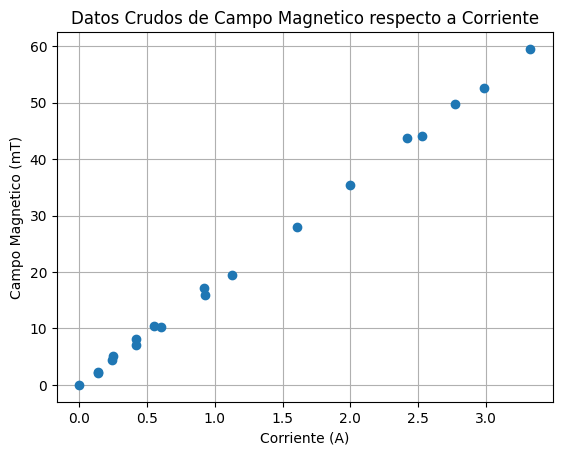

In [3]:
plt.plot(data["Corriente(A)"], data["Campo(mT)"], marker="o", linestyle='None')
plt.title('Datos Crudos de Campo Magnetico respecto a Corriente')
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnetico (mT)')
plt.grid(True)
plt.show()

In [12]:
m, b = np.polyfit(data["Corriente(A)"], data["Campo(mT)"], 1)
def prediction(x, m = m, b = b):
    return x*m + b
m, b

(np.float64(17.721958874921427), np.float64(0.06228325871515165))

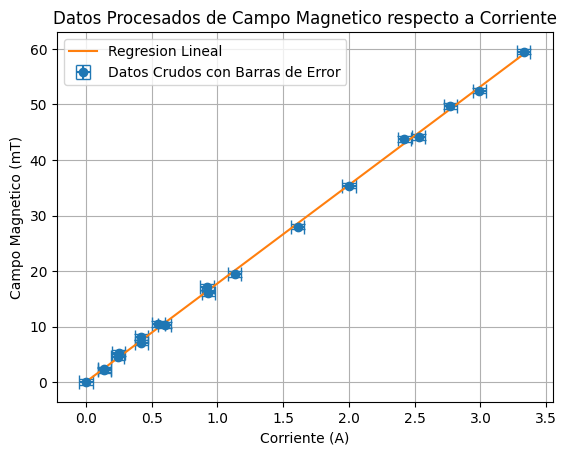

In [5]:
error_campo = 0.5  # Error constante en el campo magnético
error_corriente = 0.05  # Error constante en la corriente
plt.errorbar(
    data["Corriente(A)"],
    data["Campo(mT)"],
    xerr=error_corriente,
    yerr=error_campo,
    fmt='o',  # Formato de marcador de círculo
    label="Datos Crudos con Barras de Error",
    capsize=5  # Tamaño de los "capuchones"
)
plt.plot(data["Corriente(A)"], prediction(data["Corriente(A)"]), label="Regresion Lineal")
plt.title('Datos Procesados de Campo Magnetico respecto a Corriente')
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.savefig('Campo.png')

In [6]:
def delta(N, longitud_onda = 633):
    return (N * longitud_onda)/ 2

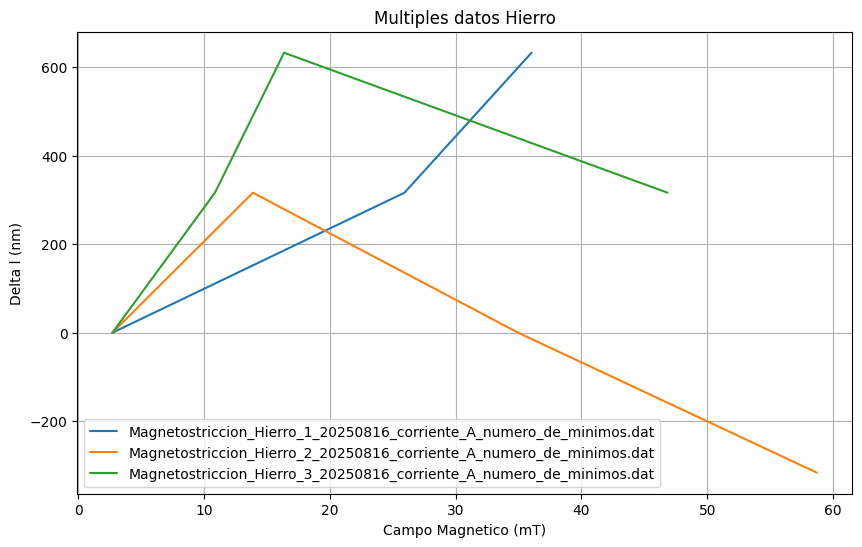

In [7]:
archivos = [x for x in os.listdir("Clean/Hierro") if "Hierro_4" not in x]

plt.figure(figsize=(10, 6))

# 3. Iterar sobre cada archivo y graficar sus datos
for archivo in archivos:
    df = pd.read_csv(f"Clean/Hierro/{archivo}").sort_values('corriente_A')
    df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
    plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label=archivo.split('/')[-1], solid_capstyle='round')

# 4. Añadir etiquetas y leyenda
plt.title('Multiples datos Hierro')
plt.ylabel('Delta l (nm)')
plt.xlabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
df = pd.read_csv(f"./Clean/Hierro/Magnetostriccion_Hierro_3_20250816_corriente_A_numero_de_minimos.dat").sort_values('corriente_A')
prediction(df['corriente_A'])

0     2.720577
1    10.872678
2    16.366485
3    46.848255
Name: corriente_A, dtype: float64

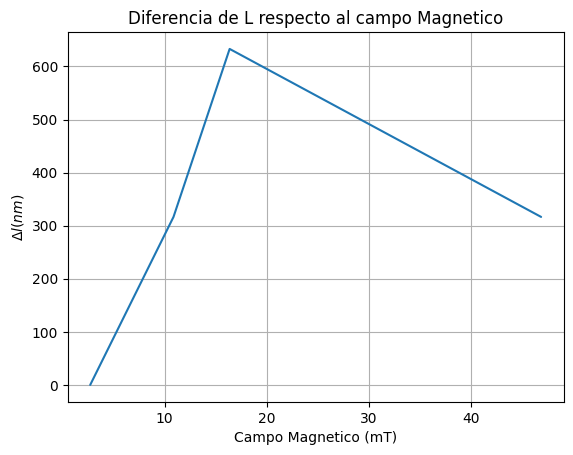

In [8]:
df = pd.read_csv(f"./Clean/Hierro/Magnetostriccion_Hierro_3_20250816_corriente_A_numero_de_minimos.dat").sort_values('corriente_A')
df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label="Datos Magnetostriccion Hierro", solid_capstyle='round')
plt.title('Diferencia de L respecto al campo Magnetico')
plt.ylabel(r'$\Delta l (nm)$')
plt.xlabel('Campo Magnetico (mT)')
plt.grid(True)
plt.show()

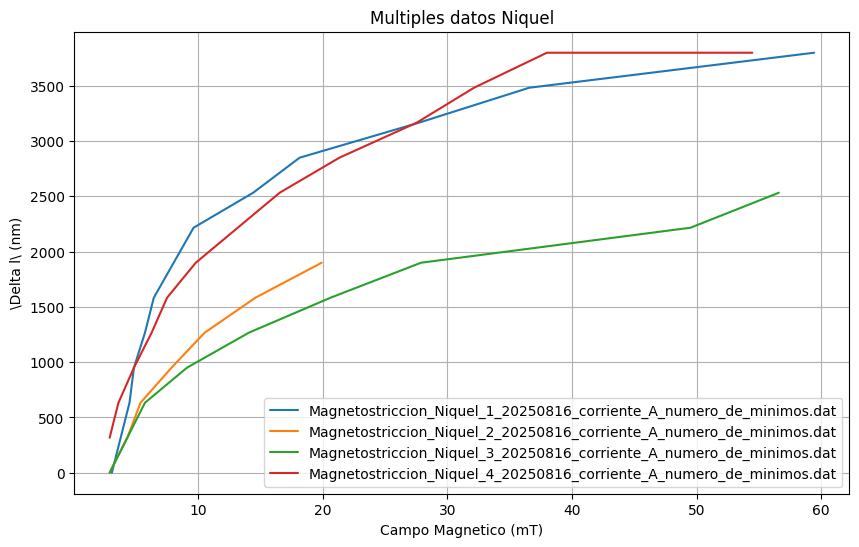

In [9]:
archivos = os.listdir("Clean/Niquel")

plt.figure(figsize=(10, 6))

# 3. Iterar sobre cada archivo y graficar sus datos
for archivo in archivos:
    df = pd.read_csv(f"Clean/Niquel/{archivo}").sort_values('corriente_A')
    df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
    plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label=archivo.split('/')[-1], solid_capstyle='round')

# 4. Añadir etiquetas y leyenda
plt.title('Multiples datos Niquel')
plt.ylabel(r'\Delta l\ (nm)')
plt.xlabel('Campo Magnetico (mT)')
plt.legend()
plt.grid(True)
plt.show()

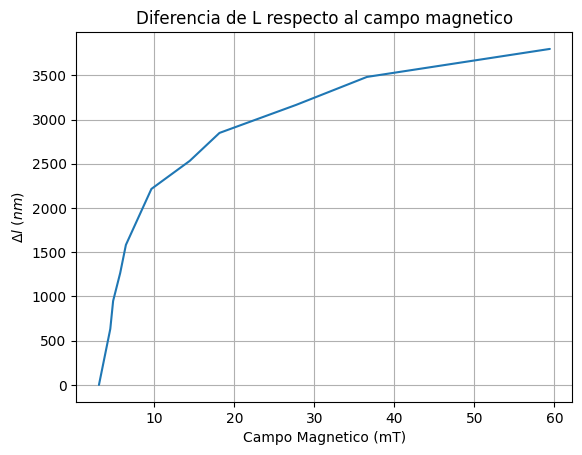

In [10]:
df = pd.read_csv(f"Clean/Niquel/Magnetostriccion_Niquel_1_20250816_corriente_A_numero_de_minimos.dat").sort_values('corriente_A')
df["minimos_acumulados"] = df['numero_de_minimos'].cumsum()
plt.plot(prediction(df['corriente_A']), delta(df['minimos_acumulados']), label=archivo.split('/')[-1], solid_capstyle='round')
plt.title('Diferencia de L respecto al campo magnetico')
plt.ylabel(r'$\Delta l\ (nm)$')
plt.xlabel('Campo Magnetico (mT)')
plt.grid(True)
plt.show()

In [23]:
df = pd.read_csv(f"Clean/Niquel/Magnetostriccion_Niquel_1_20250816_corriente_A_numero_de_minimos.dat").sort_values('corriente_A')
df['Campo_Magnetico'] = prediction(df['corriente_A'])
a = ['corriente_A', 'Campo_Magnetico', 'numero_de_minimos']
print(df[a].to_latex())

\begin{tabular}{lrrr}
\toprule
 & corriente_A & Campo_Magnetico & numero_de_minimos \\
\midrule
0 & 0.170000 & 3.075016 & 0 \\
1 & 0.250000 & 4.492773 & 2 \\
2 & 0.270000 & 4.847212 & 1 \\
3 & 0.320000 & 5.733310 & 1 \\
4 & 0.360000 & 6.442188 & 1 \\
5 & 0.450000 & 8.037165 & 1 \\
6 & 0.540000 & 9.632141 & 1 \\
7 & 0.810000 & 14.417070 & 1 \\
8 & 1.020000 & 18.138681 & 1 \\
9 & 1.560000 & 27.708539 & 1 \\
10 & 2.060000 & 36.569519 & 1 \\
11 & 3.350000 & 59.430845 & 1 \\
\bottomrule
\end{tabular}

